In [1]:
#Lectura de datos  
import pandas as pd

#Leer datos desde una hoja de excel y seleccionando la hoja
df = pd.read_excel('C:/Users/Daniel/Documents/Universidad Nacional/Diplomado IA/Bases/Gran base.xlsx', sheet_name='Renault')

df = df.transpose()

df = df[1:]

#Cambiar el formato a fecha del indice
df.index = pd.to_datetime(df.index, format='%Y%m')

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
import numpy as np
from sklearn.metrics import mean_squared_error

In [6]:
serie_0 = df.iloc[:,0]

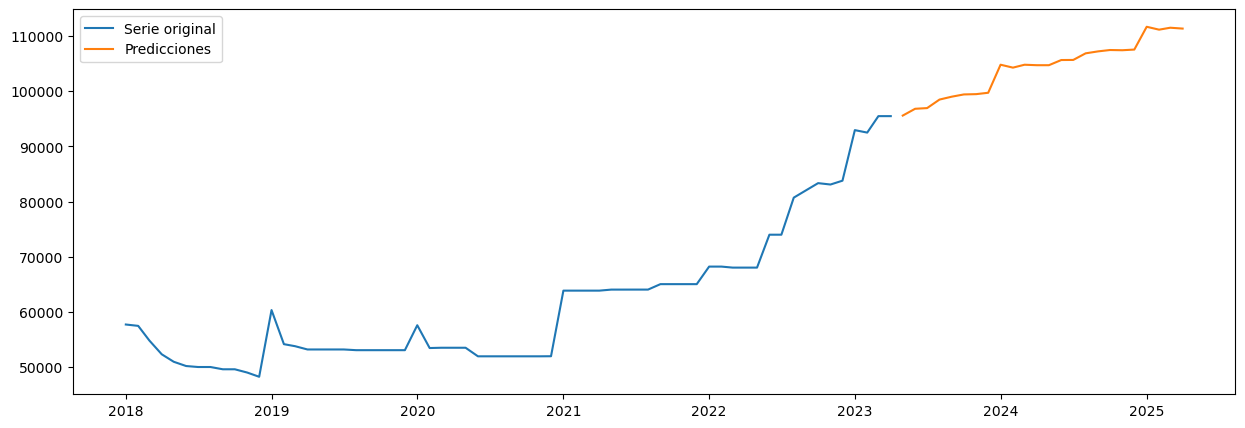

In [10]:
# Ajustar el modelo SARIMA automático
model = pm.auto_arima(serie_0, seasonal=True, m=12, suppress_warnings=True)
# Realizar predicciones a 8 meses
preds, conf_int = model.predict(24, return_conf_int=True)
#Cambiar el formato a fecha del indice
preds.index = pd.to_datetime(preds.index)
# Graficar las predicciones
plt.figure(figsize=(15,5))
plt.plot(df.iloc[:,0], label='Serie original')
plt.plot(preds, label='Predicciones')

plt.legend()
plt.show()